# K-Means Clustering

Your assignment is to use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

It may be helpful to use PCA to reduce the dimensions of your data first in order to obtain --but then again, maybe not. I dunno, you're the data scientist, you tell me.🤪 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [2]:
df = df.drop('diagnosis', axis=1)
df.head()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.dtypes

id                           int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [0]:
ids = df.id
ids
df = df.drop('id', axis=1) 

In [0]:
df = df.drop('Unnamed: 32', axis=1)

In [6]:
df.sample(5)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
265,20.730,31.12,135.70,1419.0,0.09469,0.11430,0.13670,0.086460,0.1769,0.05674,1.1720,1.6170,7.749,199.70,0.004551,0.01478,0.02143,0.009280,0.01367,0.002299,32.490,47.16,214.00,3432.0,0.1401,0.2644,0.34420,0.16590,0.2868,0.08218
154,13.150,15.34,85.31,538.9,0.09384,0.08498,0.09293,0.034830,0.1822,0.06207,0.2710,0.7927,1.819,22.79,0.008584,0.02017,0.03047,0.009536,0.02769,0.003479,14.770,20.50,97.67,677.3,0.1478,0.2256,0.30090,0.09722,0.3849,0.08633
194,14.860,23.21,100.40,671.4,0.10440,0.19800,0.16970,0.088780,0.1737,0.06672,0.2796,0.9622,3.591,25.20,0.008081,0.05122,0.05551,0.018830,0.02545,0.004312,16.080,27.78,118.60,784.7,0.1316,0.4648,0.45890,0.17270,0.3000,0.08701
61,8.598,20.98,54.66,221.8,0.12430,0.08963,0.03000,0.009259,0.1828,0.06757,0.3582,2.0670,2.493,18.39,0.011930,0.03162,0.03000,0.009259,0.03357,0.003048,9.565,27.04,62.06,273.9,0.1639,0.1698,0.09001,0.02778,0.2972,0.07712
152,9.731,15.34,63.78,300.2,0.10720,0.15990,0.41080,0.078570,0.2548,0.09296,0.8245,2.6640,4.073,49.85,0.010970,0.09586,0.39600,0.052790,0.03546,0.029840,11.020,19.49,71.04,380.5,0.1292,0.2772,0.82160,0.15710,0.3108,0.12590


In [7]:
df.describe(include='all')


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
df.columns.tolist()

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

Dropping the worst columns. They seem to be a superfulous measure of the three greatest values and not good for grouping.

In [9]:
for column in list(df.columns):
  columnsx = list(df.columns[df.columns.str.contains("_worst", regex=True)])
for column in columnsx:
  df = df.drop(column, axis=1)
df.head(1)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
0,17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193


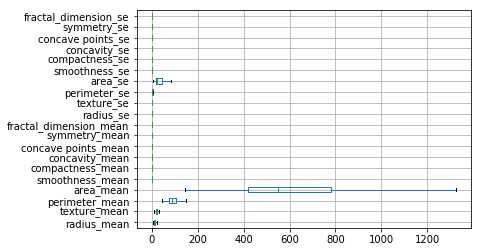

In [10]:
df.boxplot(vert=False, showfliers=False);

In [11]:
df.describe()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840


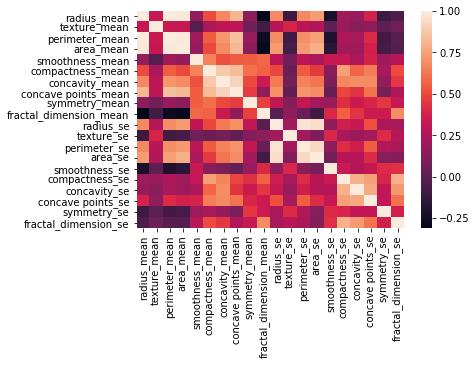

In [12]:
sns.heatmap(df.corr());

In [13]:
print("Data Frame")
print(df.head())
print()
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
print()
print("Variance -1 ddof")
print()
print(df.var(axis=0,ddof=1).sort_values())
print()
print()
print("Correlation Matrix")
print(df.corr())
print()

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df, 3))
print()

Data Frame
   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean  radius_se  texture_se  perimeter_se  area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se
0        17.99         10.38          122.80     1001.0          0.11840           0.27760          0.3001              0.14710         0.2419                 0.07871     1.0950      0.9053         8.589   153.40       0.006399         0.04904       0.05373            0.01587      0.03003              0.006193
1        20.57         17.77          132.90     1326.0          0.08474           0.07864          0.0869              0.07017         0.1812                 0.05667     0.5435      0.7339         3.398    74.08       0.005225         0.01308       0.01860            0.01340      0.01389              0.003532
2        19.69         21.25          130.00     1203

In [0]:
# 'radius_mean','perimeter_mean','perimeter_se',
# 'concavity_mean','symmetry_mean','concave points_mean',
#  'concave points_se','compactness_mean','compactness_se',
#     'fractal_dimension_se'

In [0]:
hivi = df[[
    'radius_mean',
    'perimeter_mean',
    'area_mean']].copy()

In [16]:
hivi.describe()

,radius_mean,perimeter_mean,area_mean
count,569.000000,569.000000,569.000000
mean,14.127292,91.969033,654.889104
std,3.524049,24.298981,351.914129
min,6.981000,43.790000,143.500000
25%,11.700000,75.170000,420.300000
50%,13.370000,86.240000,551.100000
75%,15.780000,104.100000,782.700000
max,28.110000,188.500000,2501.000000


In [17]:
scaler = StandardScaler()
print(scaler.fit(hivi))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [18]:
hiviC = hivi.corr()
hiviC

,radius_mean,perimeter_mean,area_mean
radius_mean,1.000000,0.997855,0.987357
perimeter_mean,0.997855,1.000000,0.986507
area_mean,0.987357,0.986507,1.000000


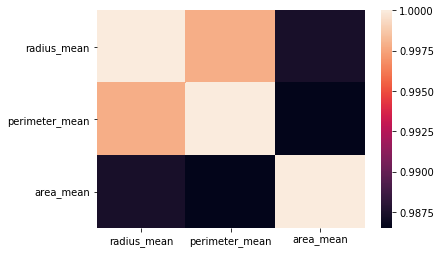

In [19]:
sns.heatmap(hivi.corr());

In [20]:
ary_hivi =np.asmatrix(hivi)
sigma = np.cov(ary_hivi.T)
sigma

array([[1.24189201e+01, 8.54471417e+01, 1.22448341e+03],
       [8.54471417e+01, 5.90440480e+02, 8.43577235e+03],
       [1.22448341e+03, 8.43577235e+03, 1.23843554e+05]])

In [21]:
sigma.shape

(3, 3)

In [22]:
eigVals, eigVec = np.linalg.eig(sigma)
eigVals

array([1.24430351e+05, 4.83314020e-02, 1.60142028e+01])

In [0]:
sorted_index = eigVals.argsort()[::-1] 
eigVals = eigVals[sorted_index]
eigVec = eigVec[:,sorted_index]

In [24]:
eigVec

array([[-0.00986514, -0.12783733, -0.99174608],
       [-0.06796434, -0.98941513,  0.12821292],
       [-0.99763898,  0.06866821,  0.00107233]])

In [25]:
eigVals

array([1.24430351e+05, 1.60142028e+01, 4.83314020e-02])

In [26]:
eigVec = eigVec[:,:2]
eigVec

array([[-0.00986514, -0.12783733],
       [-0.06796434, -0.98941513],
       [-0.99763898,  0.06866821]])

In [27]:
eigVec = pd.DataFrame(np.real(eigVec))

transformed = ary_hivi.dot(eigVec)

transformed

matrix([[-1007.16011049,   -55.06309355],
        [-1332.10466972,   -43.06883858],
        [-1209.18929771,   -48.53322763],
        ...,
        [ -863.59830525,   -50.35156745],
        [-1271.73833139,   -54.3852234 ],
        [ -183.90605951,   -35.97584467]])

In [28]:
ids = pd.DataFrame(ids)
transformed = pd.DataFrame(transformed)
print(transformed.shape)
print(ids.shape)
ids.head()

(569, 2)
(569, 1)


,id
0,842302
1,842517
2,84300903
3,84348301
4,84358402


In [29]:
final_df = transformed
final_df.columns = ['x','y']
final_df.head()

,x,y
0,-1007.160110,-55.063094
1,-1332.104670,-43.068839
2,-1209.189298,-48.533228
3,-390.573742,-51.705932
4,-1303.319899,-47.201135


In [30]:
final_df['ids'] = ids.id
final_df.ids = final_df.ids.astype(str)
final_df.sample(10)


,x,y,ids
84,-447.601596,-47.228925,8612080
495,-685.971806,-50.247339,914333
0,-1007.160110,-55.063094,842302
380,-390.471388,-47.299808,901549
113,-338.179701,-46.308109,864292
307,-249.637736,-40.000993,89346
539,-173.358951,-37.110461,921362
373,-1341.213243,-44.339662,901288
138,-683.228820,-51.172110,868826
56,-1157.999135,-47.521576,857637


In [31]:
final_df.sample(10)
final_df.describe()

,x,y
count,569.000000,569.000000
mean,-659.732878,-47.831486
std,352.746866,4.001775
min,-2508.068118,-59.266790
25%,-788.091766,-50.168229
50%,-555.874427,-48.325727
75%,-424.498760,-46.328441
max,-146.206220,-16.687795


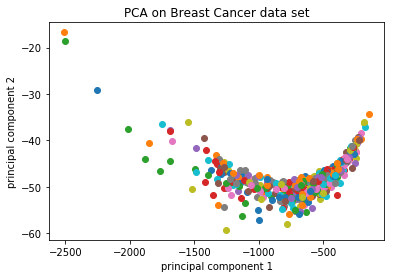

In [32]:
groups = final_df.groupby('ids')
figure, axes = plt.subplots()
axes.margins(0.05)
for name, group in groups:
    axes.plot(group.x, group.y, marker='o', linestyle='', ms=6, label=name)
    axes.set_title("PCA on Breast Cancer data set")
# axes.legend()
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")
plt.show()

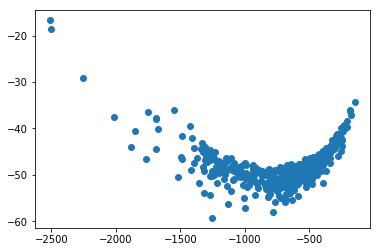

In [33]:
plt.scatter(final_df.x, final_df.y)
plt.show();

# You take it from here!

See what you can come up with. You have all the know-how! 

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to do PCA on this data to see if that helps you find distinct linearly-separable clusters.
  - (In the real world, truly linearly-separable clusters are rare.)
- You might want to use an elbow chart to decide on the number of clusters to use.
- You might want to use a scree plot to decide how many principal components to include in your clustering.
- You might want to standardize your data before PCA (If you decide to use PCA). 

## Manage your time and don't spend it all on data exploration or something like that. You got this!

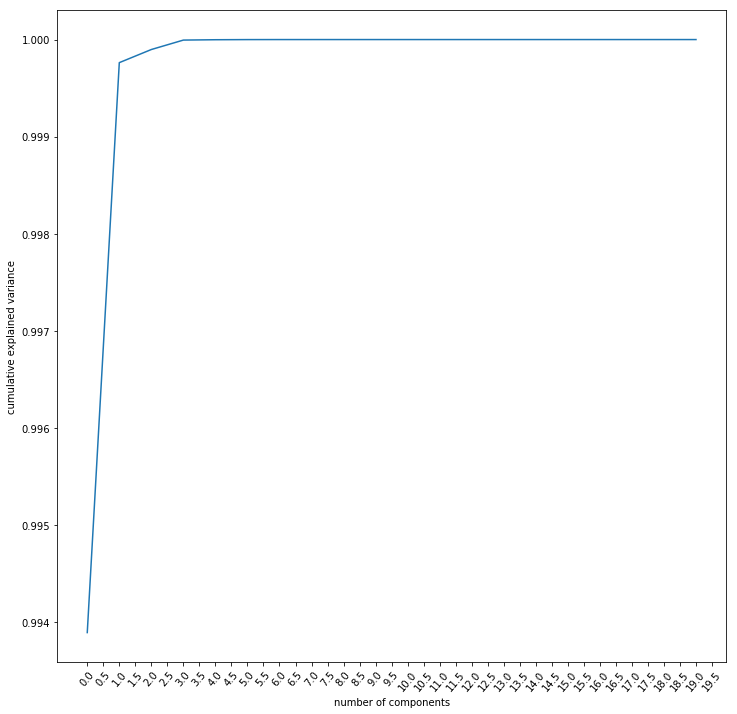

In [40]:
pca = PCA()
pca.fit(df)

plt.figure(figsize=(12,12))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xticks(np.arange(0, 20, step=0.5),rotation=50)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [47]:
pca = PCA(n_components=4)
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [48]:
print(pca.components_)

[[ 9.80517360e-03  3.89575395e-03  6.75601358e-02  9.92297082e-01
   7.08145477e-06  7.43936457e-05  1.54446909e-04  9.01422524e-05
   1.18128964e-05 -5.59855795e-06  5.76502389e-04 -9.98271820e-05
   4.16886760e-03  1.03213613e-01 -1.39005426e-06  1.08214634e-05
   1.78030540e-05  6.50832280e-06 -1.63147123e-06 -1.33716983e-07]
 [-1.27808711e-02  2.89676290e-04 -7.37699057e-02 -9.81544230e-02
   8.81268432e-05  1.67777356e-04  3.10910301e-04  6.24909130e-05
   1.68711510e-04  5.89603287e-05  6.14099645e-03  5.57653291e-03
   4.35909227e-02  9.91358192e-01  3.85774920e-05  1.22600020e-04
   1.89467641e-04  4.31529813e-05  9.71933303e-05  2.29984464e-05]
 [ 3.17535979e-02  9.50852555e-01  2.98487243e-01 -2.63689278e-02
   7.16523960e-06  2.62851122e-03  3.23323511e-03  9.94064819e-04
   7.08695747e-04  1.32017315e-04  4.44442647e-03  5.46357578e-02
   4.17987950e-02  1.75572795e-02  2.89163296e-05  9.68389569e-04
   1.03922355e-03  2.15695019e-04  1.20282372e-04  7.63749627e-05]
 [-1.10

In [49]:
print(pca.explained_variance_)

[1.25766403e+05 7.42358472e+02 1.70976932e+01 1.22911556e+01]


In [50]:
df_pca = pca.transform(df)
print("original shape:   ", df.shape)
print("transformed shape:", df_pca.shape)

original shape:    (569, 20)
transformed shape: (569, 4)


Text(0, 0.5, 'component 2')

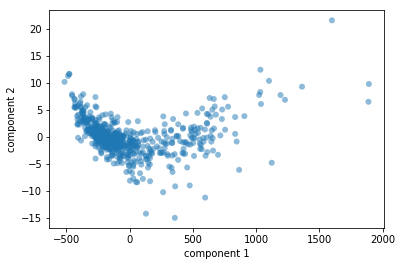

In [53]:
plt.scatter(df_pca[:, 0], df_pca[:, 3], edgecolor='none', alpha=0.5,)
plt.xlabel('component 1')
plt.ylabel('component 2')



# Stretch Goal:

Once you are satisfied with your clustering, go back and add back in the labels from the original dataset to check how accurate your clustering was. Remember that this will not be a possibility in true unsupervised learning, but it might be a helpful for your learning to be able to check your work against the "ground truth". Try different approaches and see which one is the most successful and try understand why that might be the case. If you go back and try different methods don't ever include the actual "diagnosis" labels in your clustering or PCA.

**Side Note** Data Science is never DONE. You just reach a point where the cost isn't worth the benefit anymore. There's always more moderate to small improvements that we could make. Don't be a perfectionist, be a pragmatist.